# Scipy.optimize.curve_fit

In [1]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# lets generate a stimulated data, where we have X and y
np.random.seed(1)
X = np.random.randint(1,20,25)

In [16]:
X

array([ 6, 12, 13,  9, 10, 12,  6, 16,  1, 17,  2, 13,  8, 14,  7, 19,  6,
       19, 12, 11, 15, 19,  5, 10, 18])

In [17]:
# in this case, y is linearly related to X, therefore, we expect the linear function to perform the best
np.random.seed(2)
y = -1 + X*3.5 + 10*np.random.randn(25)
# here the intercept is -1, slope is 3.5 and some randon noise is added

Text(0.5, 1.0, 'Distribution of data')

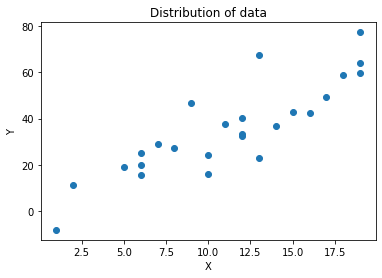

In [19]:
# lets visualize the data we have
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribution of data')

In [49]:
# this callable function is the first parameter to the function curve_fit.
# the parameters are given such that func(x,*params) - y is minimized
def func(x,a,b):
    return a + x*b

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [50]:
# the first return value is an array of all the values of the coefficients, which were given as an input to the above function.
popt,pcov = curve_fit(func,X,y)

In [51]:
# these are the values returned by the function curve fit, we can see that the intercept -0.69 is close to the choosen 
# value of -1, whlie estimated slope is 3.247 is close to the true value of 3.5.
print(popt)

[-0.69098784  3.2476999 ]


In [52]:
# this gives the correlation between the estimators
print(pcov)
# if one needs to find the std dev , then
print('Std dev of estimates are ',np.sqrt(np.diag(pcov)))

[[24.45764497 -1.80404084]
 [-1.80404084  0.16107507]]
Std dev of estimates are  [4.94546711 0.40134159]


In [53]:
# lets now generate some test values, and see how it is predicting for the 
X_test = np.random.randint(0,25,30)

In [54]:
# as a measure of fit, we will calculate the root mean squared error for test_data
# since it is a stimulated data we can calculate y_test
np.random.seed(2)
y_test = -1 + X_test*3.5 + 10*np.random.randn(30)
RMSE = np.sqrt(np.sum((y_test - func(X_test,*popt))**2) / len(X_test))
print('Root Mean squred error  is -',RMSE)

Root Mean squred error  is - 9.356681126734257


Text(0.5, 1.0, 'Linear fit')

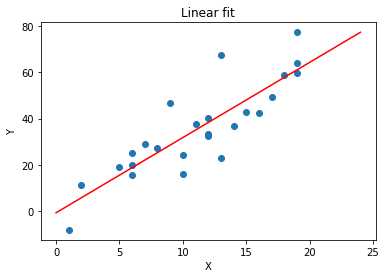

In [55]:
plt.scatter(X,y)
sns.lineplot(X_test,func(X_test,popt[0],popt[1]),color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear fit')

## We can use any function to fit the data, just change the first paramter to curve fit

# Quadratic

[14.06155054  0.14239792]
Root Mean squred error  is - 13.488919462878902


Text(0.5, 1.0, 'Quad fit')

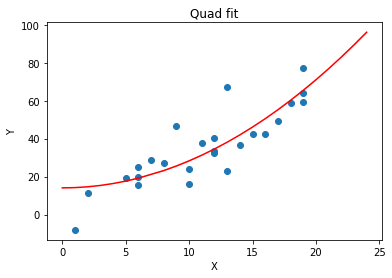

In [57]:
# just change the func used for optimization
def func(x,a,b):
    return a + b*x**2

popt,pcov = curve_fit(func,X,y)

print(popt)

X_test = np.random.randint(0,25,50)

np.random.seed(2)
y_test = -1 + X_test*3.5 + 10*np.random.randn(50)
RMSE = np.sqrt(np.sum((y_test - func(X_test,*popt))**2) / len(X_test))
print('Root Mean squred error  is -',RMSE)

plt.scatter(X,y)
sns.lineplot(X_test,func(X_test,popt[0],popt[1]),color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quad fit')

# Cubic

[ 1.04551542e+01  2.43375808e-01 -5.16003922e-03]
Root Mean squred error  is - 10.756198331477277


Text(0.5, 1.0, 'Cubic')

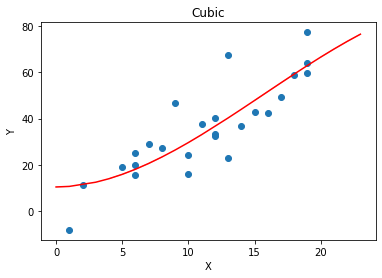

In [58]:
def func(x,a,b,c):
    return a + b*x**2 + c*x**3

popt,pcov = curve_fit(func,X,y)

print(popt)

X_test = np.random.randint(0,25,50)

np.random.seed(2)
y_test = -1 + X_test*3.5 + 10*np.random.randn(50)
RMSE = np.sqrt(np.sum((y_test - func(X_test,*popt))**2) / len(X_test))
print('Root Mean squred error  is -',RMSE)

plt.scatter(X,y)
sns.lineplot(X_test,func(X_test,popt[0],popt[1],popt[2]),color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic')

# log

[-15.48702599  22.77687623]
Root Mean squred error  is - inf


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'LOG')

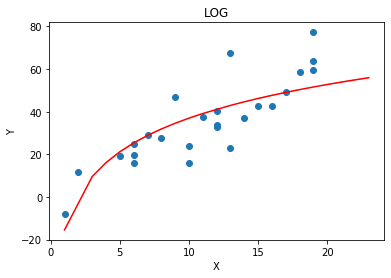

In [60]:
def func(x,a,b):
    return a + b* np.log(x)

popt,pcov = curve_fit(func,X,y)

print(popt)

X_test = np.random.randint(0,25,50)

np.random.seed(2)
y_test = -1 + X_test*3.5 + 10*np.random.randn(50)
RMSE = np.sqrt(np.sum((y_test - func(X_test,*popt))**2) / len(X_test))
print('Root Mean squred error  is -',RMSE)

plt.scatter(X,y)
sns.lineplot(X_test,func(X_test,popt[0],popt[1]),color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LOG')

# Exponential

[3.00097224e+01 2.21584085e-07]
Root Mean squred error  is - 453.8158813913978


Text(0.5, 1.0, 'Exponential')

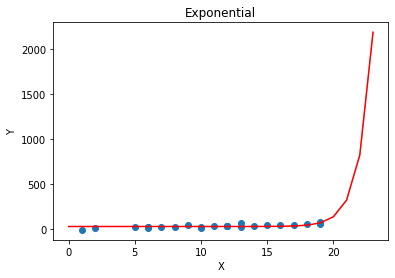

In [61]:
def func(x,a,b):
    return a + b*(np.exp(x))

popt,pcov = curve_fit(func,X,y)

print(popt)

X_test = np.random.randint(0,25,50)

np.random.seed(2)
y_test = -1 + X_test*3.5 + 10*np.random.randn(50)
RMSE = np.sqrt(np.sum((y_test - func(X_test,*popt))**2) / len(X_test))
print('Root Mean squred error  is -',RMSE)

plt.scatter(X,y)
sns.lineplot(X_test,func(X_test,popt[0],popt[1]),color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Exponential')

In [65]:
# gen function

# def func(X,*params)
#     -------- 

def curve_fit_test(func,X,y):
    popt,pcov = curve_fit(func,X,y)

    print('Coefficients are ',popt)

    X_test = np.random.randint(0,25,50)

    np.random.seed(2)
    y_test = -1 + X_test*3.5 + 10*np.random.randn(50)
    RMSE = np.sqrt(np.sum((y_test - func(X_test,*popt))**2) / len(X_test))
    print('Root Mean squred error  is -',RMSE)

    plt.scatter(X,y)
    sns.lineplot(X_test,func(X_test,popt[0],popt[1]),color = 'red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Resultant fit')

# that;s all.
# play with the func, change some values and see how it goes :)